In [2]:
import numpy as np
xy = np.loadtxt('./data-02-stock_daily.csv',delimiter=",")

In [5]:
seq_length = 7
train_size = int(len(xy)*0.7)
train_set = xy[:train_size]
test_set = xy[train_size - seq_length:]
print(train_set.shape, test_set.shape)

(512, 5) (227, 5)


In [6]:
def minmax_scaler(data):
    numerator = data -np.min(data,0)
    denominator = np.max(data,0)-np.min(data,0)
    return numerator / (denominator +1e-7)

In [7]:
train_set = minmax_scaler(train_set)
test_set = minmax_scaler(test_set)

In [12]:
def build_dataset(time_series_data, seq_length):
    data_X = []; data_y=[]
    for i in range(0, len(time_series_data)-seq_length):
        x_ = time_series_data[i: i+seq_length,:]
        y_ = time_series_data[i+seq_length,[-1]]
        data_X.append(x_); data_y.append(y_)
    return np.array(data_X), np.array(data_y)

In [13]:
train_X,train_y = build_dataset(train_set,seq_length)
test_X, test_y =build_dataset(test_set,seq_length)

In [14]:
import torch
import torch.optim as optim
import matplotlib.pyplot as plt

In [15]:
data_dim = 5
hidden_dim = 10
output_dim = 1
learning_rate = 0.01
iterations = 500

In [16]:
train_X_tensor = torch.FloatTensor(train_X)
train_y_tensor = torch.FloatTensor(train_y)
test_X_tensor = torch.FloatTensor(test_X)
test_y_tensor = torch.FloatTensor(test_y)

In [20]:
class Net(torch.nn.Module):
    def __init__(self, input_dim, hidden_dim, output_dim, layers):
        super(Net,self).__init__()
        self.rnn = torch.nn.LSTM(input_dim,hidden_dim,num_layers=layers,batch_first=True)
        self.fc = torch.nn.Linear(hidden_dim,output_dim,bias=True)
        
    def forward(self,x):
        x, _status = self.rnn(x)
        x = self.fc(x[:,-1])
        return x

net = Net(data_dim, hidden_dim, output_dim , 1)

In [21]:
criterion = torch.nn.MSELoss()
optimizer = optim.Adam(net.parameters(),lr = learning_rate)

In [22]:
for i in range(iterations):
    optimizer.zero_grad()
    outputs = net(train_X_tensor)
    loss = criterion(outputs, train_y_tensor)
    loss.backward()
    optimizer.step()
    print(i,loss.item())

0 0.19940131902694702
1 0.13691458106040955
2 0.08694770187139511
3 0.05133635923266411
4 0.032218631356954575
5 0.030514081940054893
6 0.04114609584212303
7 0.05073706805706024
8 0.05064549669623375
9 0.04277708753943443
10 0.03242316097021103
11 0.023775460198521614
12 0.018745528534054756
13 0.017254242673516273
14 0.018092080950737
15 0.019766507670283318
16 0.02103792317211628
17 0.02113853394985199
18 0.019796589389443398
19 0.01717393659055233
20 0.013767448253929615
21 0.010279593989253044
22 0.007444371934980154
23 0.005805501248687506
24 0.005490620154887438
25 0.0060962894931435585
26 0.006826525554060936
27 0.006901452783495188
28 0.00600058026611805
29 0.0044138082303106785
30 0.002807630691677332
31 0.001806427724659443
32 0.0016625813441351056
33 0.002175921807065606
34 0.0028615861665457487
35 0.0032415231689810753
36 0.0030921597499400377
37 0.0025280467234551907
38 0.0018983869813382626
39 0.0015631270362064242
40 0.0016715945675969124
41 0.002077430486679077
42 0.002

329 0.0007924488745629787
330 0.0007911312859505415
331 0.0007898173644207418
332 0.000788507517427206
333 0.0007872015121392906
334 0.0007858992903493345
335 0.0007846010848879814
336 0.0007833066629245877
337 0.0007820164901204407
338 0.0007807298679836094
339 0.0007794472621753812
340 0.000778168672695756
341 0.0007768938085064292
342 0.0007756229024380445
343 0.0007743561291135848
344 0.0007730929064564407
345 0.0007718342239968479
346 0.000770578917581588
347 0.0007693278603255749
348 0.0007680807611905038
349 0.0007668373873457313
350 0.0007655979134142399
351 0.0007643625722266734
352 0.0007631312473677099
353 0.0007619037642143667
354 0.0007606802391819656
355 0.0007594607886858284
356 0.0007582451216876507
357 0.000757033412810415
358 0.0007558258366771042
359 0.0007546220440417528
360 0.0007534222677350044
361 0.0007522264495491982
362 0.0007510348223149776
363 0.0007498470949940383
364 0.0007486630347557366
365 0.0007474832236766815
366 0.0007463074289262295
367 0.0007451354

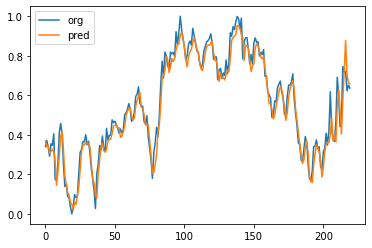

In [24]:
plt.plot(test_y)
plt.plot(net(test_X_tensor).data.numpy())
plt.legend(['org','pred'])
plt.show()

In [35]:
x = torch.FloatTensor([-1.8,0.6,1.0])
w = torch.FloatTensor([2])
b = torch.FloatTensor([3])
torch_tensor_x = torch.FloatTensor(x)
z = w * x + b
print(w,b,torch_tensor_x)

tensor([2.]) tensor([3.]) tensor([-1.8000,  0.6000,  1.0000])


In [36]:
!pip install tensorflow-gpu

In [38]:
import tensorflow as tf
import keras

In [39]:
# tensorflow 1.0 style
g = tf.Graph()
with g.as_default():
    x = tf.compat.v1.placeholder(dtype=tf.float32,shape=(None), name="x")
    w = tf.Variable(2.0, name='weight')
    b = tf.Variable(3.0, name = 'bias')
    z = w*x +b
    init = tf.compat.v1.global_variables_initializer()
    
with tf.compat.v1.Session(graph=g) as sess:
    sess.run(init)
    for t in [-1.8,0.6,1.0]:
        print(t, sess.run(z, feed_dict={x:t}))

-1.8 -0.5999999
0.6 4.2
1.0 5.0


In [40]:
# tensorflow 2 style
w = tf.Variable(2.0, name="weight")
b = tf.Variable(3.0, name='bias')

for x in [-1.8,0.6,1.0]:
    z = w*x+b
    print(x,z)

-1.8 tf.Tensor(-0.5999999, shape=(), dtype=float32)
0.6 tf.Tensor(4.2, shape=(), dtype=float32)
1.0 tf.Tensor(5.0, shape=(), dtype=float32)


In [43]:
z = w*[-1.8,0.6,1.0]+b
print(x,z)

1.0 tf.Tensor([-0.5999999  4.2        5.       ], shape=(3,), dtype=float32)


In [58]:
class TfLinearRegressor():
    def __init__(self, learning_rate=0.01):
        self.w = tf.Variable(tf.zeros(shape=(1)))
        self.b = tf.Variable(tf.zeros(shape=(1)))
        self.optimizer = tf.keras.optimizers.SGD(lr= learning_rate)
    def fit(self,X,y,num_epochs=10):
        costs=[]
        for step in range(num_epochs):
            with tf.GradientTape() as tape:
                z_net = self.w*X+self.b
                z_net = tf.reshape(z_net,[-1])
                sqr_errors = tf.square(y-z_net)
                mean_cost = tf.reduce_mean(sqr_errors)
            grads = tape.gradient(mean_cost,[self.w,self.b])
            self.optimizer.apply_gradients(zip(grads,[self.w,self.b]))
            costs.append(mean_cost.numpy())
        return costs
    def predict(self,X):
        return self.w * X + self.b

In [59]:
lr_model = TfLinearRegressor()

In [60]:
X_train = np.arange(10).reshape((10,1))
y_train = np.array([1.0,1.3,3.1,2.0,5.0,6.3,6.6,7.4,8.0,9.0])

In [61]:
train_costs = lr_model.fit(X_train,y_train)